# Objectives

Java June is a company that owns coffee shops in a number of locations in Europe.
The company knows that stores with more reviews typically get more new customers. This is
because new customers consider the number of reviews when picking between two shops.
They want to get more insight into what leads to more reviews.
They are also interested in whether there is a link between the number of reviews and rating.
They want a report to answer these questions.

# Import & Cleaning

The first step is to load the data into a dataframe. Once that is done I have to find and deal with missing values appropriately.

There are 2 missing values in both the Ratings and Reviews columns. Dine-in and takeout options are missing 60 and 56 values respectively. In addition to this they are the wrong type and should be changed to reflect their binary nature.

In [1]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('coffee.csv')

#  Display information about the dataframe to better understand data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


The following table describes the columns of the dataset and how values in each column will be dealt with:

| Column Name     | Criteria                                                                                                   |
|-----------------|------------------------------------------------------------------------------------------------------------|
| Region          | Nominal. Store location from 10 possible regions (A to J). Missing values should be replaced with “Unknown”. |
| Place name      | Nominal. The name of the store. Missing values should be replaced with “Unknown”.                          |
| Place type      | Nominal. Type of coffee shop (Coffee shop, Cafe, Espresso bar, Others). Missing values should be replaced with “Unknown”. |
| Rating          | Ordinal. Average rating of the store from reviews on a 5-point scale. Missing values should be replaced with 0. |
| Reviews         | Nominal. The number of reviews given to the store. Missing values should be replaced with the overall median number. |
| Price           | Ordinal. The price range of products in the store (\$, \$\$, \$\$\$). Missing values should be replaced with “Unknown”. |
| Delivery Option | Nominal. Indicates if delivery is available (True or False). Missing values should be replaced with False. |
| Dine in Option  | Nominal. Indicates if dine-in is available (True or False). Missing values should be replaced with False. |
| Takeaway Option | Nominal. Indicates if take away is available (True or False). Missing values should be replaced with False. |


In [2]:
# Define a dictionary for filling missing values
fill_values = {
    'Rating': 0,
    # Fill Reviews with median only after checking for missing values
    'Dine in option': False,
    'Takeout option': False
}

# Fill missing values according to the dictionary and ensure correct data types
df.fillna(fill_values, inplace=True)

# Now fill the 'Reviews' column with the median
df['Reviews'].fillna(df['Reviews'].median(), inplace=True)

# Display the first few rows of the dataframe to confirm filling of missing values
display(df.head())

# Display information about the dataframe to confirm data types and non-null counts
df.info()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


# Exploratory Data Analysis

Looking at the bar plot some observations can be made. First, there seems to be no stores given a rating below 3.9. Second, the madjority of the ratings had a value of 4.3 or higher with the number of 4.6 and 4.7 ratings being particularly high.

Based on this information we can conclude that the only people that actually gave ratings are people that had a good rating to give. The lack of low ratings suggests either people thought all stores were worthy of a good rating or those that would not rate a store highly simply refused to give a rating.

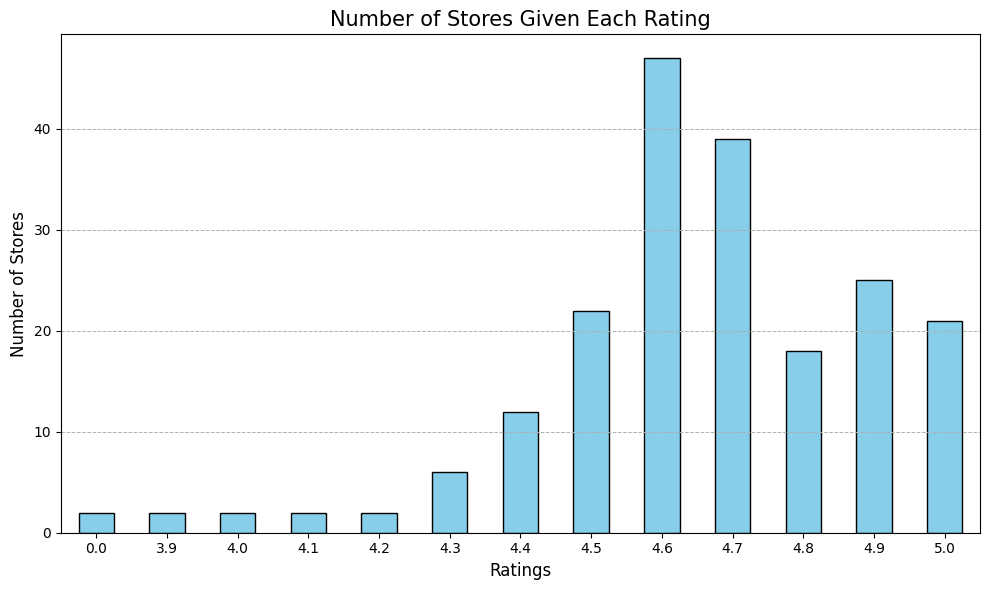

In [3]:
import matplotlib.pyplot as plt

# Create a count plot for the 'Rating' column
plt.figure(figsize=(10,6))
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Number of Stores Given Each Rating', fontsize=15)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.xticks(rotation=0)  # Rotates X-Axis Ticks by 45-degrees
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


The histogram below is right skewed which suggests that the vast majority of stores had under 2500 reviews with the majority of those being in the first bin which represents 0-598 reviews. 

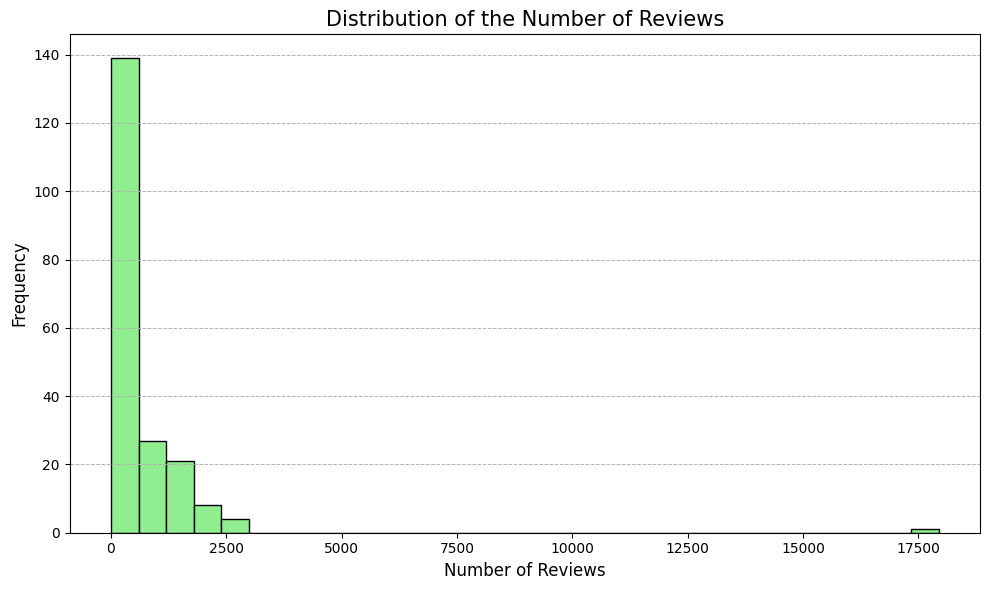

In [10]:
# Plotting the distribution of the number of reviews
plt.figure(figsize=(10,6))
plt.hist(df['Reviews'], bins=30, color='lightgreen', edgecolor='black')

# Adding title and labels
plt.title('Distribution of the Number of Reviews', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


Looking at the plot below it seems that there is not a relationship between  number of reviews and rating. Almost all the the points are in the top left corner of the graph so I would like to eliminate outliers to examine that area more closely and see if there is a relationship there.

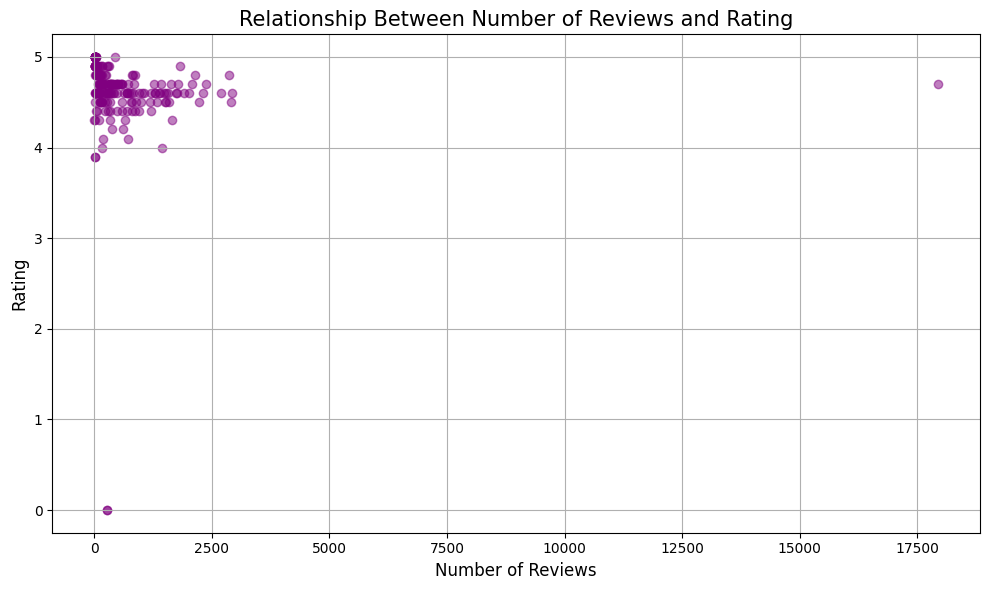

In [5]:
# Plotting the relationship between number of reviews and rating
plt.figure(figsize=(10,6))
plt.scatter(df['Reviews'], df['Rating'], alpha=0.5, color='purple')

# Adding title and labels
plt.title('Relationship Between Number of Reviews and Rating', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


After eliminating outliers it seems rating and number of reviews still do not have any kind of relationship since ratings are consistent regardless of the number of reviews.

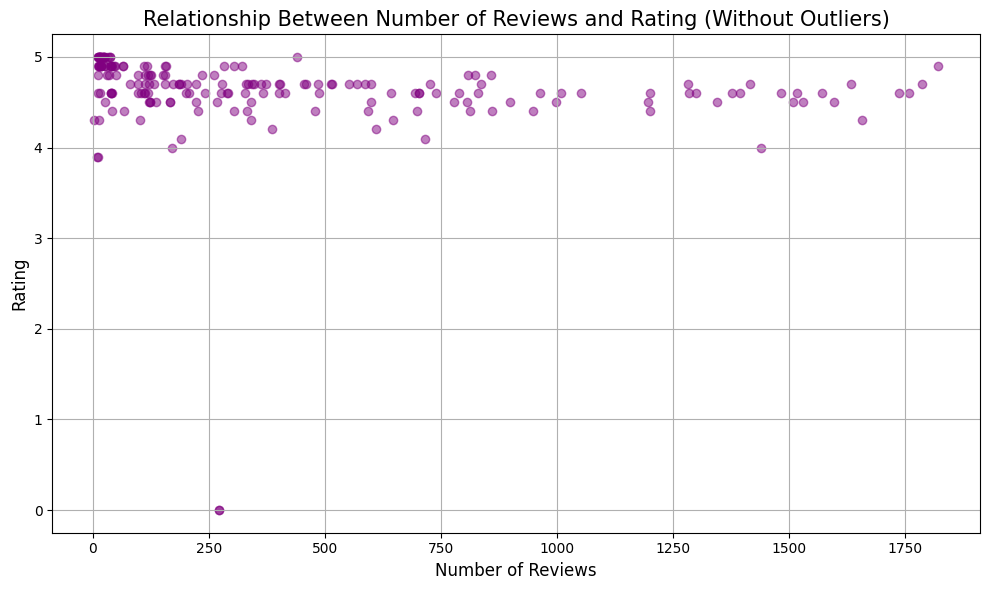

In [6]:
import numpy as np

# Calculate the interquartile range to determine outliers
Q1 = np.percentile(df['Reviews'], 25)
Q3 = np.percentile(df['Reviews'], 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['Reviews'] >= lower_bound) & (df['Reviews'] <= upper_bound)]

# Plotting the relationship without outliers
plt.figure(figsize=(10,6))
plt.scatter(filtered_df['Reviews'], filtered_df['Rating'], alpha=0.5, color='purple')

# Adding title and labels
plt.title('Relationship Between Number of Reviews and Rating (Without Outliers)', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


# Model Development

Since the goal is to use the data to predict the number of reviews this is a regression problem. Linear Regression will be chosen because it's a simple and interpretable model. Linear regression is done using 80% of the data to train the model.Based on the high MSE and RMSE values I would conclude that this model is not precise of for the purpose it is inteneded to serve.

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select categorical columns for one-hot encoding
categorical_columns = ['Region', 'Place type', 'Price']

# One-hot encode categorical variables
# We create the ColumnTransformer object and specify that we want to apply OneHotEncoder to the categorical_columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Passthrough columns that are not being transformed
)

# Apply the transformation to the dataframe
X = preprocessor.fit_transform(df.drop(['Reviews', 'Place name'], axis=1))
y = df['Reviews'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = baseline_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_rmse = np.sqrt(baseline_mse)  # Calculate the root mean squared error (RMSE)

(baseline_mse, baseline_rmse)


(634676.6177364147, 796.665938606901)

An alternate model we could use is the Random Forest. Random Forest can capture non-linear relationships. The same data is used to train the model the is resulting MSE and RMSE suggests that it is actually less precise than the linear regression.

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
comparison_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on your training data
comparison_model.fit(X_train, y_train)

# Make predictions with the model on the test data
comparison_y_pred = comparison_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
comparison_mse = mean_squared_error(y_test, comparison_y_pred)
comparison_rmse = np.sqrt(comparison_mse)

(comparison_mse, comparison_rmse)


(3080234.666990119, 1755.0597331686802)

A plot is shown below with the black dotted line representing perfect predictions, blue points representing linear regression predictions, and green representing random forest predictions. It can be seen that the blue points overall are closer to the line than the green points. This means the linear regression is the more accurate model despite it not being quite precise enough for its intended use.

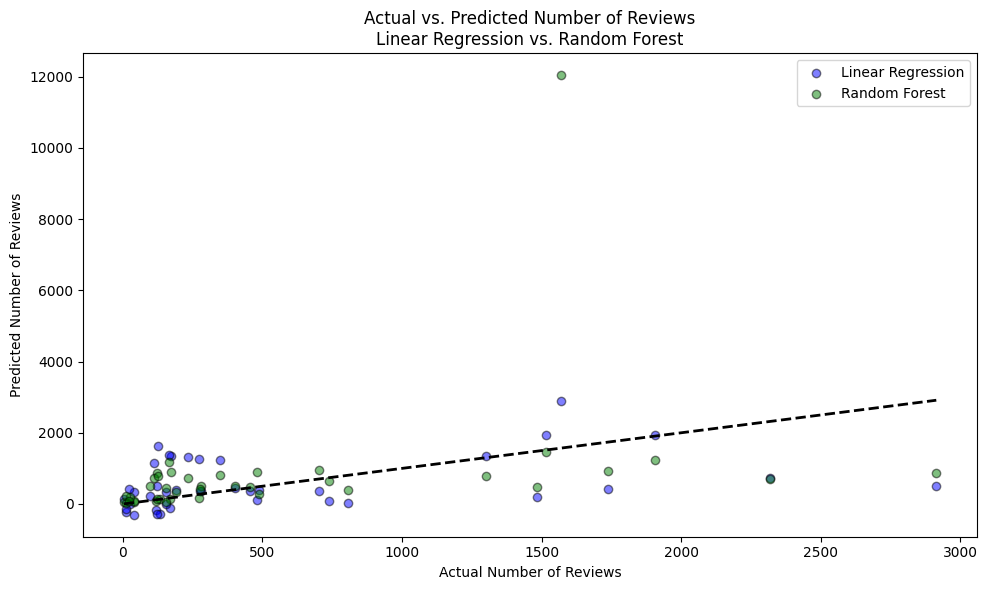

In [9]:
# Plot settings
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs. predicted values using Linear Regression
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Linear Regression', edgecolor='black')

# Scatter plot for actual vs. predicted values using Random Forest
plt.scatter(y_test, comparison_y_pred, alpha=0.5, color='green', label='Random Forest', edgecolor='black')

# Plot the line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Title and labels
plt.title('Actual vs. Predicted Number of Reviews\nLinear Regression vs. Random Forest')
plt.xlabel('Actual Number of Reviews')
plt.ylabel('Predicted Number of Reviews')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


# Recommendations

This report aimed to uncover factors that lead to a higher number of reviews for Java June's coffee shops and to evaluate the existence of a relationship between the number of reviews and store ratings. Our exploratory data analysis indicated that most stores have a rating of 4.3 or higher, and the majority of stores have fewer than 2500 reviews. The predictive modeling revealed that while Linear Regression provided a baseline prediction for the number of reviews, with an RMSE of approximately 798, it may not offer the precision required for strategic decision-making. The Random Forest model did not improve upon the Linear Regression model, suggesting the need for further model refinement.

Recommendations:

Based on our findings, we recommend the following actions for Java June:

- Customer Engagement: Increase customer engagement strategies in stores with fewer reviews to boost their online presence.
- Rating Incentives: Since ratings are generally high, consider incentivizing customers to leave reviews, potentially increasing the number of reviews across all stores.
- Further Data Collection: Collect more granular data on customer demographics, store visibility, and marketing efforts, which may help in building more precise predictive models.
- Model Refinement: Experiment with additional modeling techniques, including ensemble methods and regularization techniques, which may yield better predictions.
- Longitudinal Analysis: Consider a longitudinal analysis to understand trends over time, especially in relation to changes in marketing strategies or store operations.

By implementing these recommendations, Java June can aim to not only increase the number of reviews across its coffee shops but also utilize the insights gained to strategically drive business growth and customer satisfaction.
